
# HW 1 - Linear Regresion Gradient Descent
## ECGR 5105 - Summer 2024
#### Joshua Ayers
#### SID: 801083470
#### Professor: Vinit Katariya

For this assignment I will use numpy and pandas for data manipulaton.
For my graphing I will use matplotlib with the seaboarn extention.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

# Load data

The following code uses pandas to read the provided csv file and load the data by colum into vectors for each column

In [16]:
data = pd.read_csv('/home/laptop/ECGR_5105/HW1/HW1.csv') 

print("Data")



X1 = data['X1'].values.reshape(-1, 1)
X2 = data['X2'].values.reshape(-1, 1)
X3 = data['X3'].values.reshape(-1, 1)
y = data['Y'].values.reshape(-1, 1)

data

Data


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


## Problem 1

This problem is designed to perform linear regrssion with gradient decent for each of the variable from the provided CSV in isolation.
$$h_0(x)=\theta_{0} + \sum_{1}^{n} \theta_{n} x_n$$
Such that $\theta$ represents the parameters and $x$ represents the input features.

### 3. Cost Function
The cost function $\( J(\theta) \)$ is the Mean Squared Error (MSE):
$\[ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 \]$
In the code, this is implemented as:
$\[ \text{cost} = \frac{1}{m} \sum_{i=1}^{m} \left( X_b \cdot \theta - y \right)^2 \]$

### problem 1 subproblem 1
The formulas above are impeented in the code block below as 

In [17]:
def gradient_descent_p1(X, y, learning_rate, iterations):
    m = len(y) #
    theta = np.zeros(2)
    X_b = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 to each instance
    cost_history = []

    for iteration in range(iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y.flatten())
        theta -= learning_rate * gradients
        cost = (1/m) * np.sum((X_b.dot(theta) - y.flatten())**2)
        cost_history.append(cost)
    
    return theta, cost_history

# Training the model
note that the reason the that the learning rate of 0.05 was chosen was that the model seemed to converge fastest with the given number of itterations

In [18]:
learning_rate = 0.05
iterations = 1000


print("Problem 1: sub-problem 1")
# For X1
theta1, cost_history1 = gradient_descent_p1(X1, y, learning_rate, iterations)
print(f"Linear model for X1: y = {theta1[0]:.2f} + {theta1[1]:.2f}*X1")

# For X2
theta2, cost_history2 = gradient_descent_p1(X2, y, learning_rate, iterations)
print(f"Linear model for X2: y = {theta2[0]:.2f} + {theta2[1]:.2f}*X2")

# For X3
theta3, cost_history3 = gradient_descent_p1(X3, y, learning_rate, iterations)
print(f"Linear model for X3: y = {theta3[0]:.2f} + {theta3[1]:.2f}*X3")

Problem 1: sub-problem 1
Linear model for X1: y = 5.93 + -2.04*X1
Linear model for X2: y = 0.74 + 0.56*X2
Linear model for X3: y = 2.87 + -0.52*X3


### Problem 1 subproblem 2


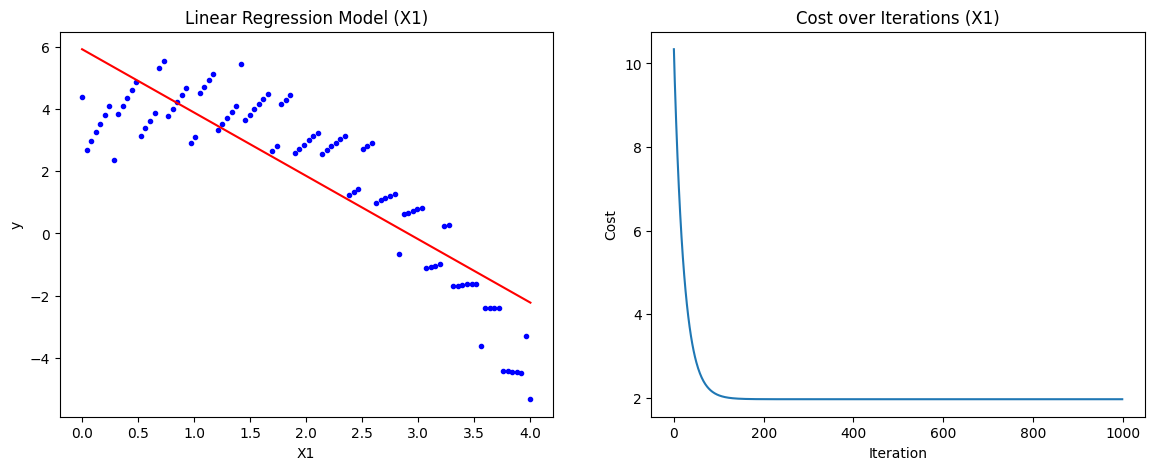

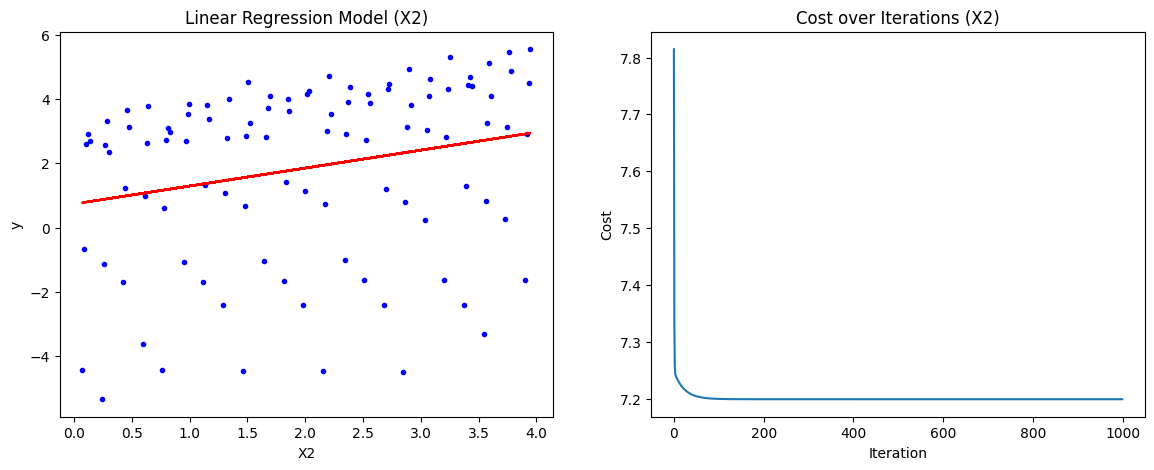

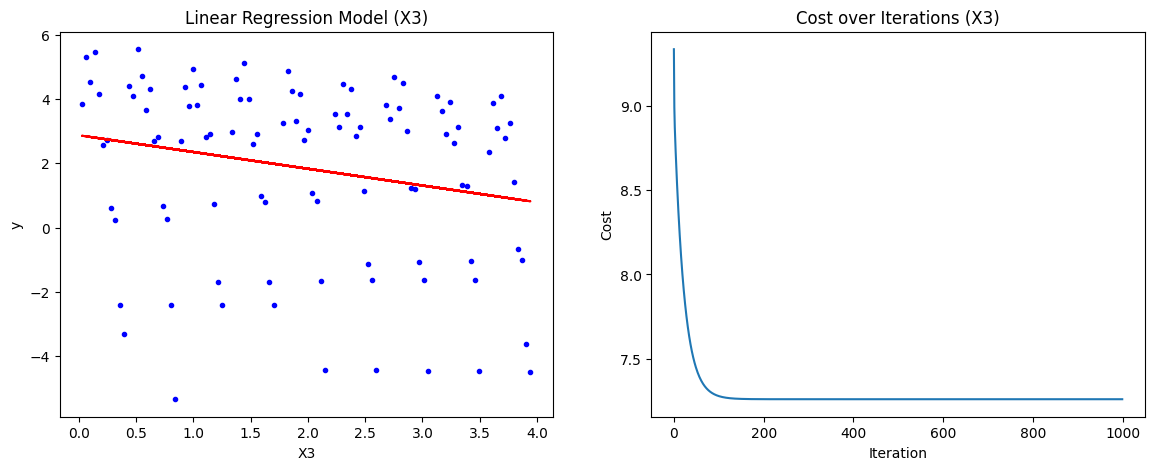

In [19]:
def plot_model_and_loss(X, y, theta, cost_history, variable_name):
    plt.figure(figsize=(14, 5))

    # Plot the regression model
    plt.subplot(1, 2, 1)
    plt.plot(X, y, "b.")
    plt.plot(X, theta[0] + theta[1] * X, "r-")
    plt.xlabel(variable_name)
    plt.ylabel("y")
    plt.title(f"Linear Regression Model ({variable_name})")

    # Plot the cost over iterations
    plt.subplot(1, 2, 2)
    plt.plot(cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"Cost over Iterations ({variable_name})")

    plt.show()

# Plot for X1
plot_model_and_loss(X1, y, theta1, cost_history1, "X1")

# Plot for X2
plot_model_and_loss(X2, y, theta2, cost_history2, "X2")

# Plot for X3
plot_model_and_loss(X3, y, theta3, cost_history3, "X3")

### Problem 1 subproblem 3
The following code takes the cost history arrays from the pervious section and assembles them into a array and uses the numpy library to find which of the variable's cost histories has the minimun value. After finding this it prints out the name of the parameter found in this way.

In [20]:
final_costs = [cost_history1[-1], cost_history2[-1], cost_history3[-1]]
min_cost_index = np.argmin(final_costs)
best_variable = ["X1", "X2", "X3"][min_cost_index]
print(f"The variable with the lowest cost is: {best_variable}")

The variable with the lowest cost is: X1


# Problem 2

## Subproblem 1: Find linear model

In [26]:
def gradient_descent_p2(X, y, learning_rate, iterations):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 to each instance
    theta = np.zeros(X_b.shape[1])
    cost_history = []

    for iteration in range(iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y.flatten())
        theta -= learning_rate * gradients
        cost = (1/m) * np.sum((X_b.dot(theta) - y.flatten())**2)
        cost_history.append(cost)
    
    return theta, cost_history

X_all = np.hstack((X1, X2, X3))
theta_all, cost_history_all = gradient_descent_p2(X_all, y, learning_rate, iterations)
print(f"Linear model using all variables: y = {theta_all[0]:.2f} + {theta_all[1]:.2f}*X1 + {theta_all[2]:.2f}*X2 + {theta_all[3]:.2f}*X3")



Linear model using all variables: y = 5.31 + -2.00*X1 + 0.53*X2 + -0.27*X3


## Subproblem 2: Plot cost loss for Problem 2

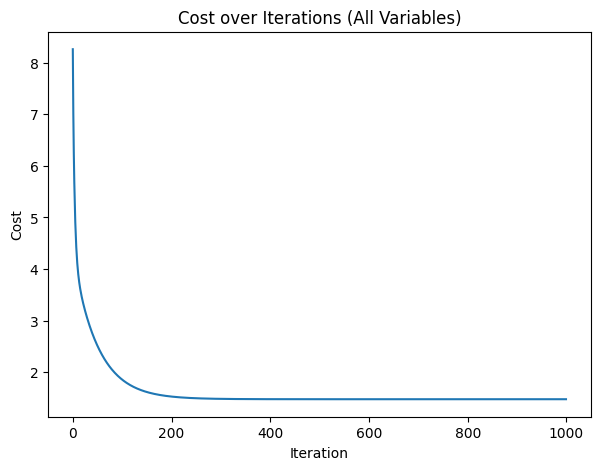

In [22]:
plt.figure(figsize=(7, 5))
plt.plot(cost_history_all)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over Iterations (All Variables)")

plt.show()

## Subproblem 3: Test diffrent learning rates
The following code runs using the 

/tmp/ipykernel_154998/3190314595.py:10: RuntimeWarning: overflow encountered in square
  cost = (1/m) * np.sum((X_b.dot(theta) - y.flatten())**2)


<Figure size 1400x500 with 0 Axes>

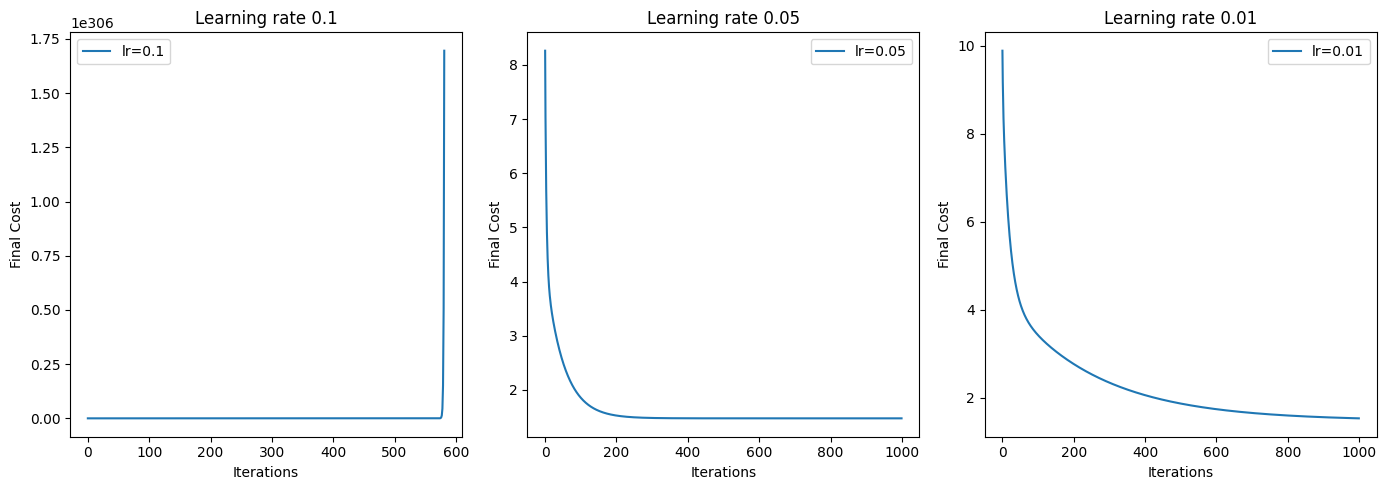

In [31]:
learning_rates = [0.1, 0.05, 0.01]

theta_lr0, cost_history_lr0 = gradient_descent_p2(X_all, y, learning_rates[0], iterations)
theta_lr1, cost_history_lr1 = gradient_descent_p2(X_all, y, learning_rates[1], iterations)
theta_lr2, cost_history_lr2 = gradient_descent_p2(X_all, y, learning_rates[2], iterations)

plt.figure(figsize=(14, 5))

# Create subplots
fig, (col1, col2, col3) = plt.subplots(1, 3, figsize=(14, 5))

# Plot for learning rate 0
col1.plot(cost_history_lr0, label=f"lr={learning_rates[0]}")
col1.set_title(f"Learning rate {learning_rates[0]}")
col1.set_xlabel("Iterations")
col1.set_ylabel("Final Cost")
col1.legend()

# Plot for learning rate 1
col2.plot(cost_history_lr1, label=f"lr={learning_rates[1]}")
col2.set_title(f"Learning rate {learning_rates[1]}")
col2.set_xlabel("Iterations")
col2.set_ylabel("Final Cost")
col2.legend()

# Plot for learning rate 2
col3.plot(cost_history_lr2, label=f"lr={learning_rates[2]}")
col3.set_title(f"Learning rate {learning_rates[2]}")
col3.set_xlabel("Iterations")
col3.set_ylabel("Final Cost")
col3.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()




### Subproblem 4: Predicting values of new data
This section I am taking the theta terms from our original model and applies them to the new space provided by the new data
The third line adds an intercept so that the matrix can be dot multiplied with the theta values without causing a value error caused by incompatible paramters.


In [29]:
# Predicting new values
new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]]) # Given data
new_values_with_intercept = np.hstack((np.ones((new_values.shape[0], 1)), new_values)) # Adding intercept term
predictions = new_values_with_intercept.dot(theta_all)
print(predictions)

array([3.57728282, 0.24429082, 0.10251123])